In [1]:
#import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [2]:
# Download and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
#Define class names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
#reshape to get 1D array instead of 2D
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

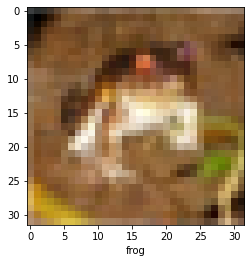

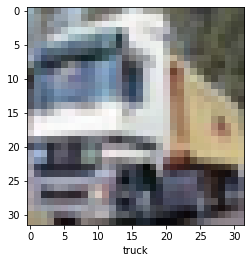

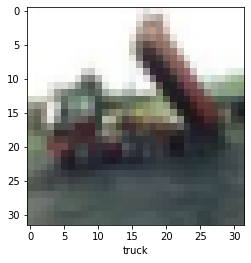

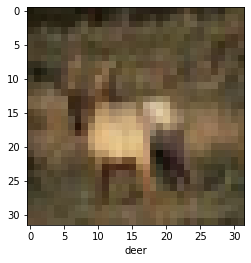

In [5]:
#Check sample
def plot_image(x,y,index):
  plt.figure(figsize=(4,4))
  plt.imshow(x[index])
  plt.xlabel(class_names[y[index]])

for i in range(0,4):
  plot_image(train_images,train_labels,i)

In [6]:
# Pre process
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
#Adam optimizer 
model = keras.Sequential([
        layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation = 'softmax')])

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5522 - accuracy: 0.4316
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2291 - accuracy: 0.5620
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0734 - accuracy: 0.6219
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9781 - accuracy: 0.6568
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9078 - accuracy: 0.6825
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8575 - accuracy: 0.6994
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8116 - accuracy: 0.7167
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7745 - accuracy: 0.7280
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7423 - accuracy: 0.7395
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [ ]:
#Evaluate the model
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.8810 - accuracy: 0.7040


[0.8809846639633179, 0.7039999961853027]

In [ ]:
#SGD optimizer 
lr = keras.layers.LeakyReLU(alpha=0.01)
model = keras.Sequential([
        layers.Conv2D(filters=64,kernel_size=(2,2),activation=lr,input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64,kernel_size=(2,2),activation=lr),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64,activation=lr),
        layers.Dense(10,activation = 'softmax')])

sgd = tf.keras.optimizers.SGD(
    learning_rate=0.05, momentum=0, nesterov=False, name="SGD"
)

model.compile(optimizer = sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.7216 - accuracy: 0.3809
Epoch 2/10
1563/1563 [==============================] - 82s 53ms/step - loss: 1.2762 - accuracy: 0.5485
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.0942 - accuracy: 0.6136
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9723 - accuracy: 0.6573
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8766 - accuracy: 0.6937
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8002 - accuracy: 0.7208
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7300 - accuracy: 0.7455
Epoch 8/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6664 - accuracy: 0.7676
Epoch 9/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6058 - accuracy: 0.7887
Epoch 10/10
1563/1563 [==============================] - 84s 54m

In [ ]:
#Evaluate the model
model.evaluate(test_images,test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.9383 - accuracy: 0.6892


[0.9383233189582825, 0.6891999840736389]

In [7]:
#Adamax optimization
lr = keras.layers.LeakyReLU(alpha=0.01)
model = keras.Sequential([
        layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64,kernel_size=(2,2),activation=lr),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64,activation=lr),
        layers.Dense(10,activation = 'softmax')])

adamax = tf.keras.optimizers.Adamax(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax"
)

model.compile(optimizer = adamax,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5991 - accuracy: 0.4261
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.2693 - accuracy: 0.5521
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1339 - accuracy: 0.6021
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0380 - accuracy: 0.6369
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9674 - accuracy: 0.6629
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9066 - accuracy: 0.6853
Epoch 7/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8532 - accuracy: 0.7056
Epoch 8/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8087 - accuracy: 0.7198
Epoch 9/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7681 - accuracy: 0.7351
Epoch 10/10
1563/1563 [==============================] - 78s 50m

In [8]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 5s 14ms/step - loss: 0.8666 - accuracy: 0.7012


[0.866599440574646, 0.701200008392334]

In [9]:
#Adagrad optimization 
lr = keras.layers.LeakyReLU(alpha=0.01)

model = keras.Sequential([
        layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64,kernel_size=(2,2),activation=lr),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64,activation=lr),
        layers.Dense(10,activation = 'softmax')])


ag = tf.keras.optimizers.Adagrad(
    learning_rate=0.05,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad"
)

model.compile(optimizer = ag,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5415 - accuracy: 0.4479
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1048 - accuracy: 0.6096
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9347 - accuracy: 0.6731
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8234 - accuracy: 0.7132
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7407 - accuracy: 0.7420
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6679 - accuracy: 0.7712
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6036 - accuracy: 0.7913
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.5442 - accuracy: 0.8148
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.4905 - accuracy: 0.8329
Epoch 10/10
1563/1563 [==============================] - 50s 32m

In [10]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 0.9784 - accuracy: 0.6984


[0.9784117937088013, 0.6984000205993652]

Text(0, 0.5, 'Highest Accuracy')

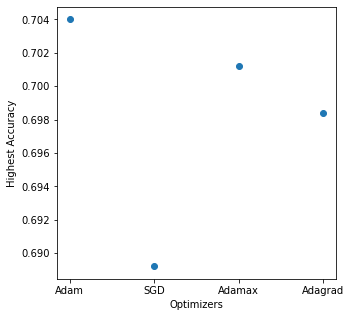

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(['Adam','SGD','Adamax','Adagrad'],[0.7040,0.6892,0.7012,0.6984])
plt.xlabel("Optimizers")
plt.ylabel("Highest Accuracy")